# Logistic Regression from scratch

In [56]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np

In [57]:
iris = datasets.load_iris(as_frame=True)
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


In [58]:
data1["target"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [59]:
data1 = data1.drop(["petal length (cm)", "petal width (cm)"], axis=1)
data1 = data1[data1["target"] != 2.0]
data1 = data1.rename(columns={"sepal length (cm)" : "X1", "sepal width (cm)" : "X2"})
X0 = np.ones(100)
data1["X0"] = X0
data1 = data1[["X0", "X1", "X2", "target"]]


In [60]:
data1

,X0,X1,X2,target
0,1.0,5.1,3.5,0.0
1,1.0,4.9,3.0,0.0
2,1.0,4.7,3.2,0.0
3,1.0,4.6,3.1,0.0
4,1.0,5.0,3.6,0.0
...,...,...,...,...
95,1.0,5.7,3.0,1.0
96,1.0,5.7,2.9,1.0
97,1.0,6.2,2.9,1.0
98,1.0,5.1,2.5,1.0


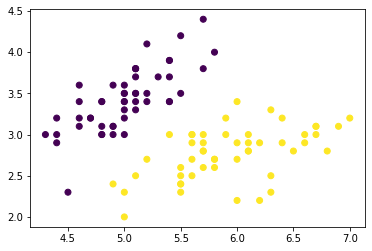

In [61]:
plt.scatter(data1["X1"], data1["X2"], c=data1["target"])

In [62]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(data1[['X0', 'X1','X2']], data1['target'], test_size=0.3)

# Estimate function

$\hat{p}=h_{\theta}(x)=\sigma(x^T\theta)$

$\sigma(t)=\frac{1}{1 + e^{(-t)}}$

In [63]:
from math import e

# after applying the activation function, estimate based on which class is more likely
def logistic_estimate(weights, feature_values):
  weighted_sum = np.dot(weights.T, feature_values)
  return 1 / (1 + e ** -weighted_sum)

def predict_all(weights, df):
  return df.apply( lambda row: int(logistic_estimate(weights, row) > 0.5), axis=1)

# Cost function

>$J(θ)= -\frac{1}{m}\sum_{i = 1}^m \left[y^{(i)}log\left(\hat{p}^{(i)}\right)+ \left(1 - y^{(i)}\right)log\left(1 - \hat{p}^{(i)}\right)\right]$

In [65]:
from math import log
def cost(weights):
  J = 0
  for index, row in X_training.iterrows():
    p = logistic_estimate(weights, row)
    y = Y_training[index]
    J -= y * log(p) + (1 - y) * log(1 - p)
  return J / len(X_training)

# Training

## Partial derivatives of cost function:

>$\frac{\delta}{\delta\theta_j}J(θ)= \frac{1}{m}\sum_{i = 1}^m
\left(
  \sigma\left(\theta^Tx^{(i)} - y^{(i)}\right)
\right)$

In [67]:
maximum_iter = 2000
learning_rate = 0.1
weights = np.array([.1, .3, -2])
m = len(X_training)
J_all = []
for _ in range(maximum_iter):
  J = 0
  Jt = np.zeros(3)
  for index, row in X_training.iterrows():
    p = logistic_estimate(weights, row)
    y = Y_training[index]
    J -= (y * log(p) + (1 - y) * log(1 - p)) * (1 / m)
    Jt += (p - y) * row * (1 / m)
  J_all.append(J)
  weights -= learning_rate * Jt

# Loss curve

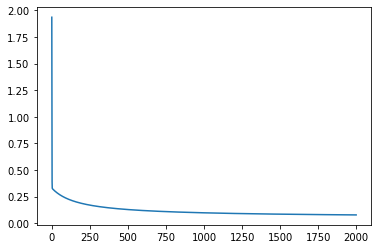

In [68]:
plt.plot(J_all)

# Evaluation

In [69]:
Y_training_predicted = predict_all(weights, X_training)
Y_testing_predicted = predict_all(weights, X_testing)

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [72]:
print('Result:')
print('Accuracy: ',accuracy_score(Y_testing, Y_testing_predicted))
print('f1_score: ', f1_score(Y_testing, Y_testing_predicted, average='weighted'))
print('Precision: ', precision_score(Y_testing, Y_testing_predicted, average='weighted'))
print('Recall: ', recall_score(Y_testing,Y_testing_predicted, average='weighted'))

Result:
Accuracy:  1.0
f1_score:  1.0
Precision:  1.0
Recall:  1.0


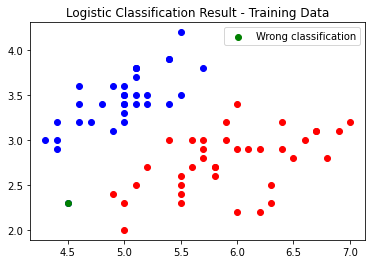

In [73]:
plt.scatter(X_training['X1'][Y_training==0],X_training['X2'][Y_training==0], color='blue')
plt.scatter(X_training['X1'][Y_training==1],X_training['X2'][Y_training==1], color='red')
plt.scatter(X_training['X1'][Y_training!=Y_training_predicted],X_training['X2'][Y_training!=Y_training_predicted],label='Wrong classification',color='green')

plt.title('Logistic Classification Result - Training Data')
plt.legend()

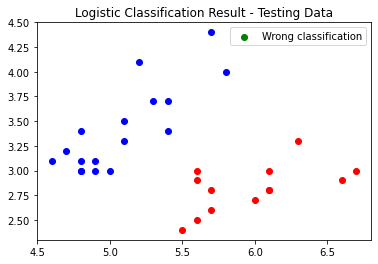

In [74]:
plt.scatter(X_testing['X1'][Y_testing==0],X_testing['X2'][Y_testing==0], color='blue')
plt.scatter(X_testing['X1'][Y_testing==1],X_testing['X2'][Y_testing==1], color='red')
plt.scatter(X_testing['X1'][Y_testing!=Y_testing_predicted],X_testing['X2'][Y_testing!=Y_testing_predicted],label='Wrong classification',color='green')

plt.title('Logistic Classification Result - Testing Data')
plt.legend()

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

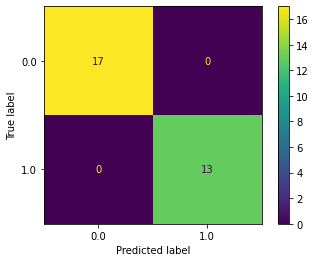

In [76]:
ConfusionMatrixDisplay.from_predictions(Y_testing, Y_testing_predicted)

In [77]:
data1["X1"].max()

7.0

In [106]:
x1_grid=np.arange(data1["X1"].min(),data1["X1"].max(),0.1)
x2_grid=np.arange(data1["X2"].min(),data1["X2"].max(),0.1)
xx1,xx2=np.meshgrid(x1_grid,x2_grid)
data_grid = np.array([xx1, xx2]).reshape(2, -1).T
data_grid.shape

(675, 2)

In [122]:
data_grid_frame = pd.DataFrame(data_grid)
data_grid_frame["X0"] = pd.Series(1 for _ in range(len(data_grid_frame)))
data_grid_frame = data_grid_frame[["X0", 0, 1]]
predicted_grid = predict_all(weights, data_grid_frame).to_numpy()
predicted_grid.shape

(675,)

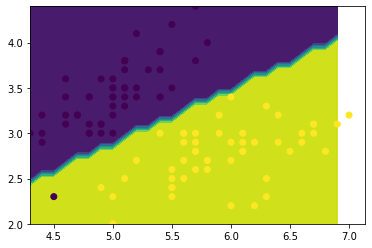

In [124]:
plt.contourf(x1_grid,x2_grid,predicted_grid.reshape(x2_grid.shape[0],x1_grid.shape[0]))
plt.scatter(data1["X1"], data1["X2"], c=data1["target"])